In [5]:
import json, requests, time
from sqlalchemy import create_engine
import pandas as pd

engine = create_engine('postgresql://postgres:argmax@pg:5432/postgres')


# Data
Every time a user opens a mobile app, an auction is going on behind the scenes. The highest bidder gets to advertise his ad to the user.
## Auctions Table

In [34]:
sql_query = 'SELECT * FROM auctions;'
with engine.connect() as db_con:
    df_auctions = pd.read_sql(sql_query, con=db_con)

df_auctions

,id,eventTimestamp,unitDisplayType,brandName,bundleId,countryCode,deviceId,osAndVersion,bidFloorPrice,sentPrice
0,1,1657758857892,rewarded,Generic,com.loop.match3d,US,6a0a94554cf,Android-4.0,0.05,0.06
1,2,1657210707978,interstitial,Generic,com.loop.match3d,ZA,6a0b0e59f45,Android-4.0,0.01,0.16
2,3,1657392939412,interstitial,Motorola,com.YayySAL.DodgeAgent,BR,6a0fa820c46,Android-10.0,0.05,0.06
3,4,1657386816882,interstitial,Huawei,com.tintash.nailsalon,IQ,6a142bdbea2,Android-9.0,0.01,0.05
4,5,1657211600823,banner,Generic,com.tilegarden.match3,US,6a16943a771,Android-4.0,0.01,0.03
...,...,...,...,...,...,...,...,...,...,...
41579,41580,1657731605063,banner,Generic,com.tilegarden.match3,NZ,80edf5837e8,Android-4.0,0.01,0.02
41580,41581,1657657131101,interstitial,Apple,1436213906,VN,80ee6a5eebf,iOS-13.6,0.01,0.90
41581,41582,1657156070854,rewarded,Generic,com.loop.match3d,US,80efe531afc,Android-4.0,0.05,0.69
41582,41583,1657659603568,banner,Apple,1502447854,US,80f02dd397f,iOS-15.0,0.01,0.10


## App Vectors table
We've gathered the first few sentences from the app store description and embedded it with a [model](https://huggingface.co/mixedbread-ai/mxbai-embed-large-v1)

In [87]:
sql_query = f'''
SELECT
    *
FROM app_vectors
'''
has_embedding = False
while not has_embedding:
    with engine.connect() as db_con:
        df_av = pd.read_sql(sql_query, con=db_con)
    has_embedding = (~df_av["embedding"].isna()).all()
    if not has_embedding:
        print("Waiting for embeddings...")
        time.sleep(15)

df_av

,id,bundleId,content,embedding
0,1,com.loop.match3d,"Get ready for a new, challenging and original ...","[0.3168352,0.6250086,-0.12035585,0.21742323,-0..."
1,2,com.YayySAL.DodgeAgent,"Your mission, should you choose to accept it, ...","[0.5411282,0.7446755,-0.5817451,0.95967793,0.0..."
2,3,com.tintash.nailsalon,It is manicure madness over here and it�s your...,"[0.31176656,0.6059464,-1.1395648,0.07631045,-0..."
3,4,com.tilegarden.match3,\nIf you enjoy playing Match 3 tile & mahjong ...,"[0.050924458,1.0967327,-0.30831614,0.13220672,..."
4,6,com.AppIdeas.LevelUpRunner,"Are you a real hero? Are you the strongest, th...","[0.897561,0.46442518,-0.18019226,1.2617054,0.0..."
5,17,1582745578,Dominate the coal industry and become the next...,"[0.88490486,0.65851957,-0.3386694,0.18323663,0..."
6,18,1569586264,Choose the appropriate outfit to make it throu...,"[0.2000534,0.36083463,-0.13792263,0.34308642,-..."
7,5,com.kamilbilge.ropesavior3d,Become the hero we need in this tangled puzzle...,"[0.5112473,0.5128061,-0.05630451,1.2819325,0.1..."
8,7,se.ace.fishinc,Gather your riches and travel across the open ...,"[0.73094344,0.4112171,-0.6196014,0.53501374,0...."
9,8,com.volt.dresstoimpress,\nChoose the appropriate outfit to make it thr...,"[0.2000534,0.36083463,-0.13792263,0.34308642,-..."


We can use the `<=>` operator to run vector search within the database

In [36]:

vec = json.loads(df_av.embedding[0]) # get the first embedding
print ("Embedding size: {l}".format(l=len(vec)))

sql_query = f'''
SELECT
    "bundleId"
FROM app_vectors
ORDER BY embedding<=>'{json.dumps(vec)}'
'''
with engine.connect() as db_con:
    df = pd.read_sql(sql_query, con=db_con)

df

Embedding size: 1024


,bundleId
0,com.loop.match3d
1,1502447854
2,1529614832
3,com.tilegarden.match3
4,com.kamilbilge.ropesavior3d
5,1579489488
6,1436213906
7,1586795332
8,com.AppIdeas.LevelUpRunner
9,se.ace.fishinc


In [153]:
# extract the score for the similarity
vec = json.loads(df_av.embedding[0]) # get the first embedding
print ("Embedding size: {l}".format(l=len(vec)))

sql_query = f'''
SELECT
    "bundleId", embedding<=>'{json.dumps(vec)}' as distance 
FROM app_vectors
ORDER BY distance
'''
with engine.connect() as db_con:
    df_dist = pd.read_sql(sql_query, con=db_con)

df_dist

Embedding size: 1024


,bundleId,distance
0,com.loop.match3d,0.000000
1,1502447854,0.077363
2,1529614832,0.280942
3,com.tilegarden.match3,0.341363
4,com.kamilbilge.ropesavior3d,0.442120
5,1579489488,0.442120
6,1436213906,0.469628
7,1586795332,0.490351
8,com.AppIdeas.LevelUpRunner,0.490351
9,se.ace.fishinc,0.497076


# What you need to do
## The hypothesis
We assume that apps with similar desciptions, would have a similar asking price in the auctions (`sentPrice` column).

Use cosine similarity (`<=>`) on the embeddings to find similar apps, and any statistical tools you find suitable to prove or disprove this hypothesis.

## Is it consistent?
There are several other features in the auctions table (such as `CountryCode` and `OS`), 
Do your findings hold for those as well?

In [ ]:
# TODO: Please write your analysis here

# TL;DR
For the first part of the analysis, I concluded that there's no correlation between embedding distances (app similarity) and sent prices. However, I cannot definitively reject the null hypothesis because the p-value exceeds 0.05. Regarding the secondary segment, upon examining the correlation between four attributes ('unitDisplayType', 'countryCode', 'bidFloorPrice', 'osAndVersion') and the sent price, I found that none of these features show a statistically significant correlation with the sent price.

In [152]:
vec = json.loads(df_av.embedding[0]) # get the first embedding
print ("Embedding size: {l}".format(l=len(vec)))

sql_query = f'''
SELECT
    a."bundleId", av.embedding<=>'{json.dumps(vec)}' as distance, a."sentPrice" 
FROM auctions a
JOIN app_vectors av ON a."bundleId" = av."bundleId"
ORDER BY distance
'''
with engine.connect() as db_con:
    df_join_sentprice = pd.read_sql(sql_query, con=db_con)

df_join_sentprice

Embedding size: 1024


,bundleId,distance,sentPrice
0,com.loop.match3d,0.000000,0.77
1,com.loop.match3d,0.000000,0.16
2,com.loop.match3d,0.000000,0.24
3,com.loop.match3d,0.000000,0.02
4,com.loop.match3d,0.000000,0.30
...,...,...,...
41579,1523081624,0.540656,0.16
41580,com.tintash.nailsalon,0.540656,0.02
41581,1523081624,0.540656,0.34
41582,1523081624,0.540656,24.25


sentPrice mean 1.3296457772220085
sentPrice median 0.07
sentPrice std 7.118817134413606


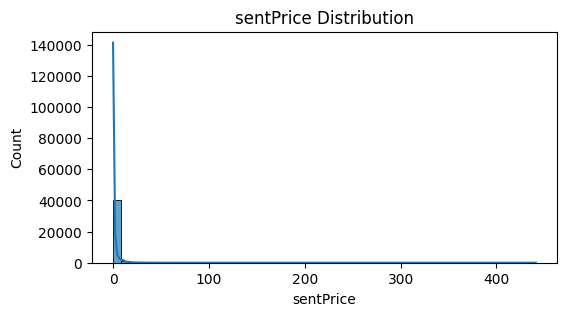

In [218]:
sent_price = df_auctions.sentPrice
print('sentPrice mean', sent_price.mean())
print('sentPrice median', sent_price.median())
print('sentPrice std', sent_price.std())
plt.figure(figsize=(6, 3))
sns.histplot(sent_price, alpha=0.7, bins=50, kde=True)
plt.title('sentPrice Distribution')
plt.show()

In [220]:
z_scores = stats.zscore(sent_price)
outliers = sent_price[(z_scores.abs() > 3)]
print('number of outliers:', len(outliers))
outliers

number of outliers: 320


304       27.09
465       28.45
610       43.35
637       30.26
762      297.50
          ...  
40984     42.65
41050     31.20
41060    111.43
41248     24.95
41419     24.28
Name: sentPrice, Length: 320, dtype: float64

<Axes: xlabel='sentPrice'>

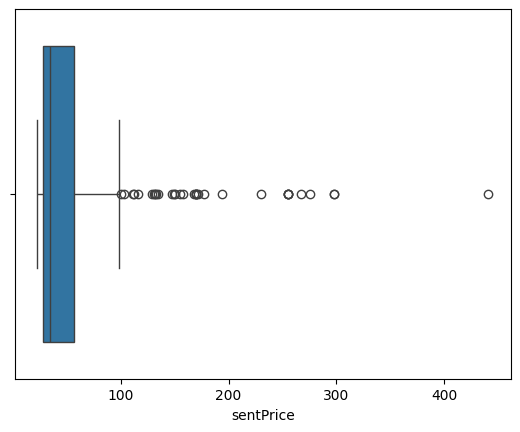

In [221]:
sns.boxplot(x=outliers)

I've noticed outliers in the data, but I assume they're not errors or anomalies. Believing they represent valid rare cases, I've chosen to keep them.

In [231]:
df_auctions['normalized_sentPrice'] = stats.zscore(df_auctions.sentPrice)
df_auctions

,id,eventTimestamp,unitDisplayType,brandName,bundleId,countryCode,deviceId,osAndVersion,bidFloorPrice,sentPrice,normalized_sentPrice
0,1,1657758857892,rewarded,Generic,com.loop.match3d,US,6a0a94554cf,Android-4.0,0.05,0.06,-0.178353
1,2,1657210707978,interstitial,Generic,com.loop.match3d,ZA,6a0b0e59f45,Android-4.0,0.01,0.16,-0.164305
2,3,1657392939412,interstitial,Motorola,com.YayySAL.DodgeAgent,BR,6a0fa820c46,Android-10.0,0.05,0.06,-0.178353
3,4,1657386816882,interstitial,Huawei,com.tintash.nailsalon,IQ,6a142bdbea2,Android-9.0,0.01,0.05,-0.179758
4,5,1657211600823,banner,Generic,com.tilegarden.match3,US,6a16943a771,Android-4.0,0.01,0.03,-0.182567
...,...,...,...,...,...,...,...,...,...,...,...
41579,41580,1657731605063,banner,Generic,com.tilegarden.match3,NZ,80edf5837e8,Android-4.0,0.01,0.02,-0.183972
41580,41581,1657657131101,interstitial,Apple,1436213906,VN,80ee6a5eebf,iOS-13.6,0.01,0.90,-0.060354
41581,41582,1657156070854,rewarded,Generic,com.loop.match3d,US,80efe531afc,Android-4.0,0.05,0.69,-0.089854
41582,41583,1657659603568,banner,Apple,1502447854,US,80f02dd397f,iOS-15.0,0.01,0.10,-0.172734


In [156]:
!pip install scikit-learn
!pip install matplotlib
!pip install scipy
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 1.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 532.8 kB/s eta 0:00:000:0100:01


In [179]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kstest
from scipy.stats import spearmanr
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import defaultdict

# Here I want to explore the charachters of each bundle

id: com.loop.match3d :
Mean: 1.4208114761859671
Median: 0.1
Std: 8.483918225341391


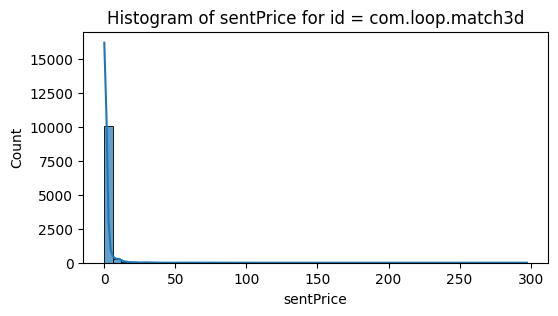

id: com.YayySAL.DodgeAgent :
Mean: 0.4455293221629855
Median: 0.07
Std: 1.5496422841335467


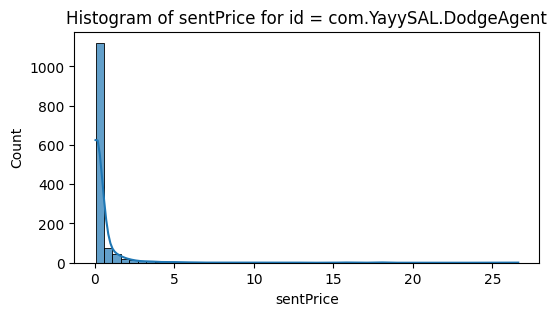

id: com.tintash.nailsalon :
Mean: 0.30005710206995
Median: 0.03
Std: 2.334697734375032


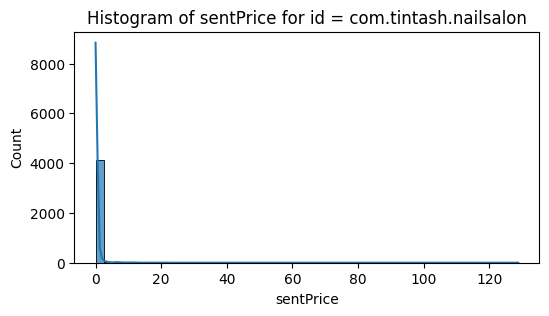

id: com.tilegarden.match3 :
Mean: 2.2972606486908953
Median: 0.06
Std: 9.004379510556182


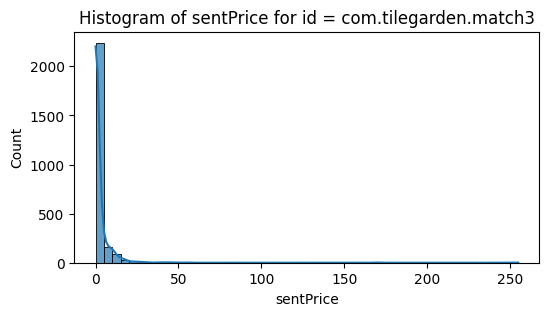

id: com.AppIdeas.LevelUpRunner :
Mean: 0.13154740923510752
Median: 0.07
Std: 0.23164634817236485


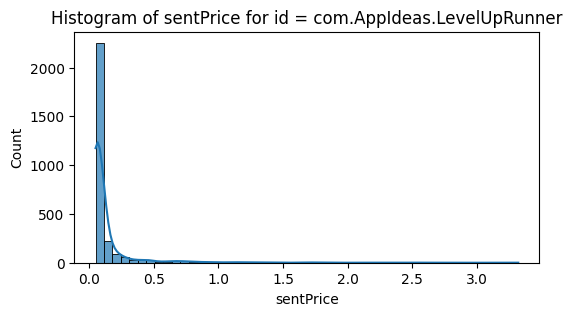

id: 1582745578 :
Mean: 2.179090909090909
Median: 0.11
Std: 8.747192021698323


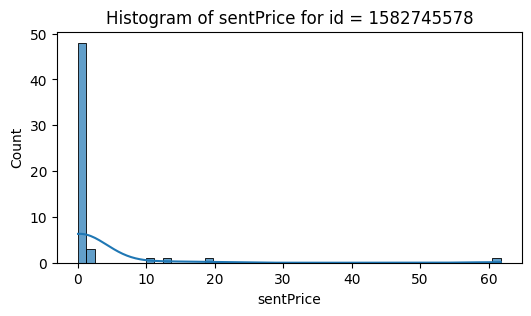

id: 1569586264 :
Mean: 18.900178571428572
Median: 13.905000000000001
Std: 16.551332541420454


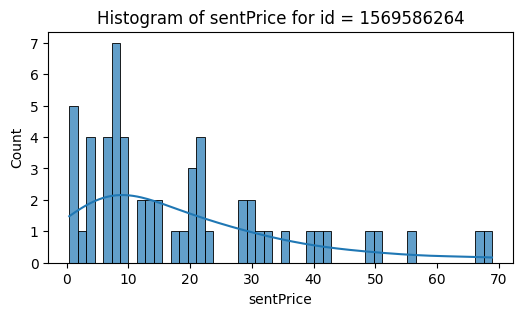

id: com.kamilbilge.ropesavior3d :
Mean: 0.4514908515925006
Median: 0.07
Std: 2.127699298652047


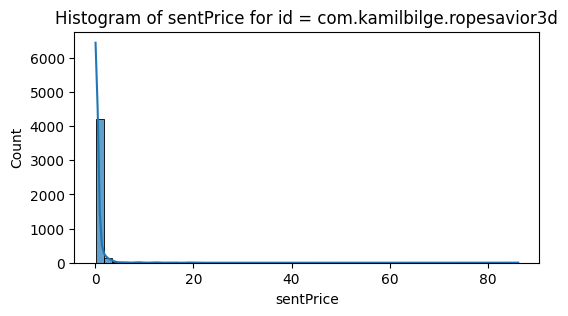

id: se.ace.fishinc :
Mean: 1.8319223067681218
Median: 0.06
Std: 6.554923280422561


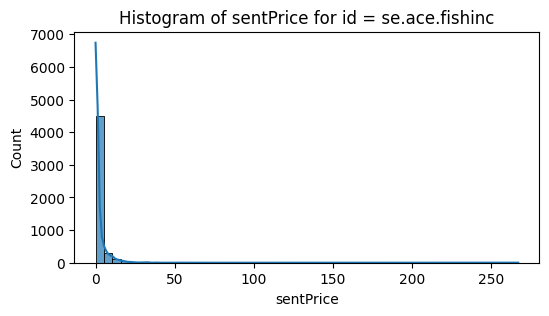

id: com.volt.dresstoimpress :
Mean: 0.44525454545454535
Median: 0.05
Std: 0.872513173675283


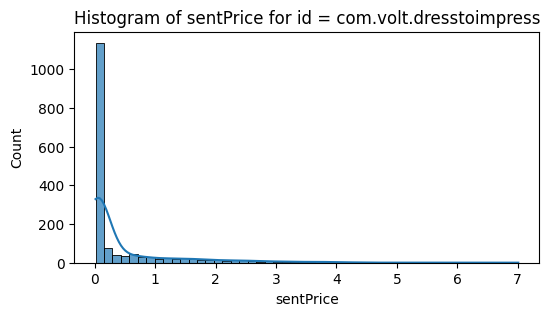

id: dovi.coalmining.inc :
Mean: 0.5933110367892975
Median: 0.06
Std: 2.778193045049931


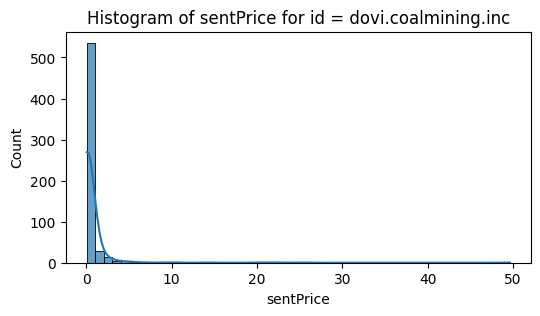

id: 1529614832 :
Mean: 3.1218160377358495
Median: 0.11
Std: 13.530938456838891


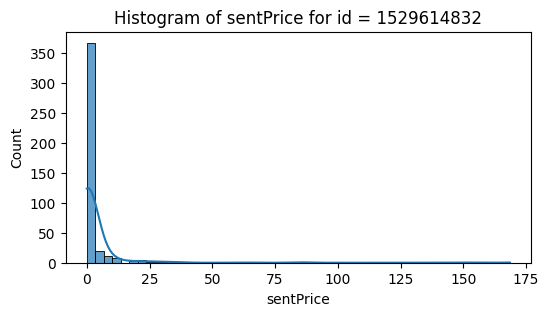

id: 1523081624 :
Mean: 1.101837128521806
Median: 0.07
Std: 4.240221117756417


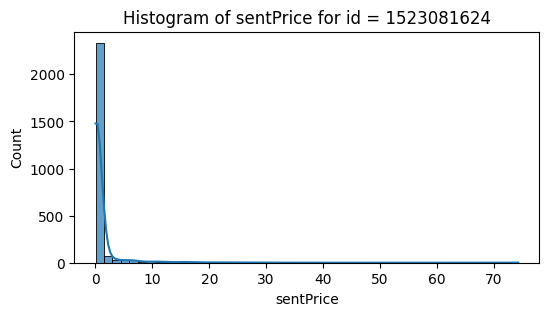

id: 1502447854 :
Mean: 2.2694819466248037
Median: 0.16
Std: 10.809523419675175


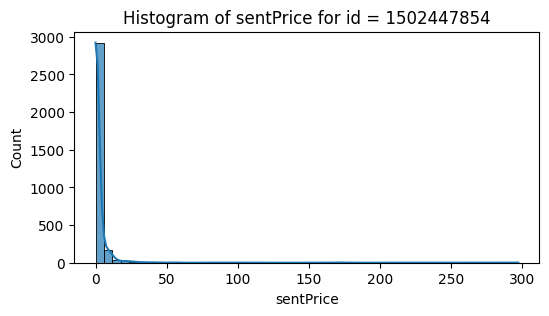

id: 1436213906 :
Mean: 4.718554502369669
Median: 1.94
Std: 14.974076346957158


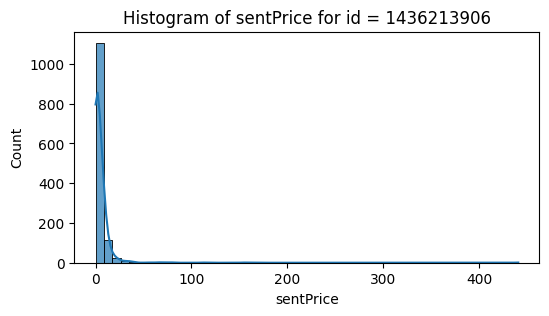

id: 1542256628 :
Mean: 2.1147967479674796
Median: 0.46499999999999997
Std: 4.982564616935805


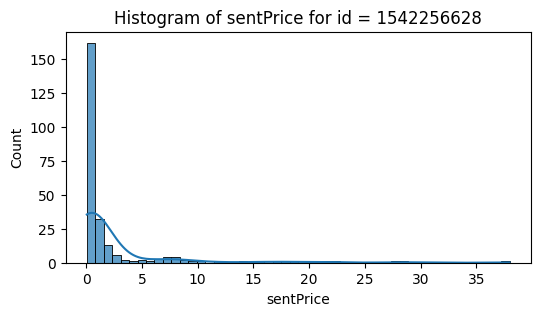

id: 1579489488 :
Mean: 1.1132083333333334
Median: 0.08
Std: 3.167361829124867


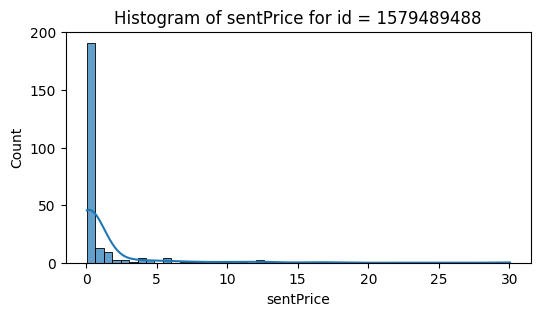

id: 1586795332 :
Mean: 1.5983641160949866
Median: 0.16
Std: 5.136435985446618


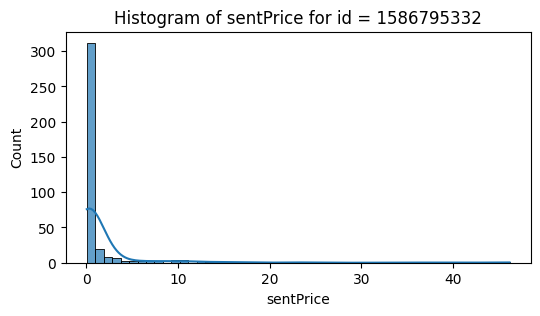

In [266]:
# info of each bundleId
avgs = []
stds = []
medians = []
id_to_info = {}
bundle_ids = np.array(df_av.bundleId)
for id in bundle_ids:
    id_sentPrice = df_auctions.loc[df_auctions['bundleId'] == id, 'sentPrice']
    avg = np.mean(id_sentPrice)
    avgs.append(avg)
    std = np.std(df_auctions.loc[df_auctions['bundleId'] == id, 'sentPrice'])
    stds.append(std)
    median = np.median(df_auctions.loc[df_auctions['bundleId'] == id, 'sentPrice'])
    medians.append(median)
    id_to_info[id] = {'avg': avg, 'median': median, 'std': std}
    print("id:", id, ":")
    print("Mean:", avg)
    print("Median:", median)
    print("Std:", std)
    plt.figure(figsize=(6, 3))
    sns.histplot(id_sentPrice, alpha=0.7, bins=50, kde=True)
    plt.title('Histogram of sentPrice for id = ' + id)
    plt.show()

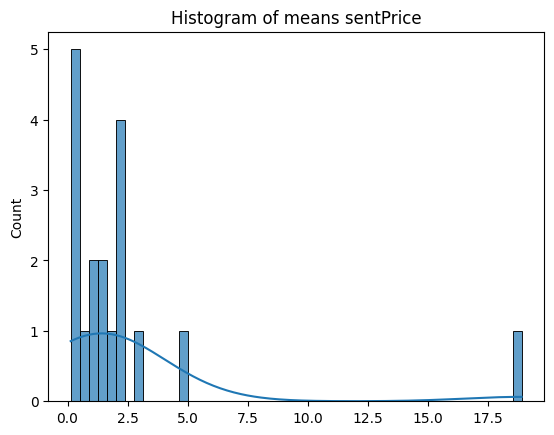

In [267]:
sns.histplot(avgs, alpha=0.7, bins=50, kde=True)
plt.title('Histogram of means sentPrice')
plt.show()

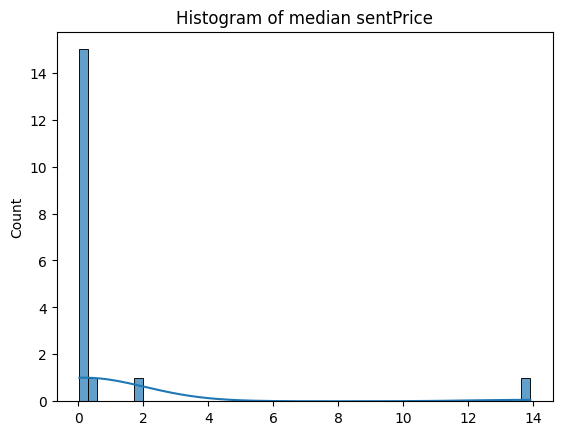

In [139]:
sns.histplot(medians, alpha=0.7, bins=50, kde=True)
plt.title('Histogram of median sentPrice')
plt.show()

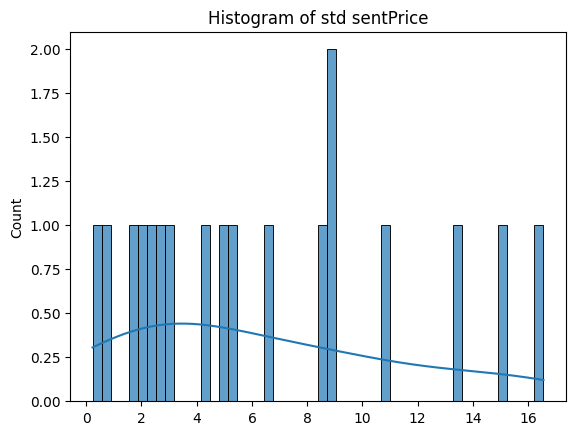

In [137]:
sns.histplot(stds, alpha=0.7, bins=50, kde=True)
plt.title('Histogram of std sentPrice')
plt.show()

In [268]:
bundle_ids = np.array(df_av.bundleId)
id_avg_sentPrice_df = pd.DataFrame(index=bundle_ids, columns=['mean_sentPrice'])
for id in bundle_ids:
    id_sentPrice = df_auctions.loc[df_auctions['bundleId'] == id, 'sentPrice']
    avg = np.mean(id_sentPrice)
    id_avg_sentPrice_df.loc[id, 'mean_sentPrice'] = avg
id_avg_sentPrice_df

,mean_sentPrice
com.loop.match3d,1.420811
com.YayySAL.DodgeAgent,0.445529
com.tintash.nailsalon,0.300057
com.tilegarden.match3,2.297261
com.AppIdeas.LevelUpRunner,0.131547
1582745578,2.179091
1569586264,18.900179
com.kamilbilge.ropesavior3d,0.451491
se.ace.fishinc,1.831922
com.volt.dresstoimpress,0.445255


In [151]:
# creating an embedding distances df
bundle_ids = np.array(df_av.bundleId)
dist_df = pd.DataFrame(0, index=bundle_ids, columns=bundle_ids)
dist_df = dist_df.astype(float)
for id1 in bundle_ids:
    for id2 in bundle_ids:
        vec1 = json.loads(df_av.loc[df_av['bundleId'] == id1, 'embedding'].iloc[0])
        vec2 = json.loads(df_av.loc[df_av['bundleId'] == id2, 'embedding'].iloc[0])

        sql_query = f'''
        SELECT
            '{json.dumps(vec1)}' <=> '{json.dumps(vec2)}' as sim_score
        FROM
            app_vectors
        '''
        with engine.connect() as db_con:
            dist = pd.read_sql(sql_query, con=db_con)
        dist = list(dist.iloc[0])[0]
        dist_df.loc[id1, id2] = dist
dist_df

,com.loop.match3d,com.YayySAL.DodgeAgent,com.tintash.nailsalon,com.tilegarden.match3,com.AppIdeas.LevelUpRunner,1582745578,1569586264,com.kamilbilge.ropesavior3d,se.ace.fishinc,com.volt.dresstoimpress,dovi.coalmining.inc,1529614832,1523081624,1502447854,1436213906,1542256628,1579489488,1586795332
com.loop.match3d,0.000000,0.519025,0.540656,0.341363,0.490351,0.530259,0.498199,0.442120,0.497076,0.498199,0.530259,0.280942,0.540656,0.077363,0.469628,0.519025,0.442120,0.490351
com.YayySAL.DodgeAgent,0.519025,0.000000,0.610829,0.553061,0.410429,0.509314,0.562197,0.352162,0.514294,0.562197,0.509314,0.555603,0.610829,0.495702,0.489774,0.000000,0.352162,0.410429
com.tintash.nailsalon,0.540656,0.610829,0.000000,0.581153,0.545834,0.474850,0.495526,0.602592,0.548918,0.495526,0.474851,0.602279,0.000000,0.502151,0.521262,0.610829,0.602592,0.545834
com.tilegarden.match3,0.341363,0.553061,0.581153,0.000000,0.592141,0.555205,0.537533,0.515130,0.521064,0.537533,0.555205,0.141846,0.581153,0.338355,0.519442,0.553061,0.515130,0.592141
com.AppIdeas.LevelUpRunner,0.490351,0.410429,0.545834,0.592141,0.000000,0.550057,0.462763,0.409027,0.573123,0.462763,0.550057,0.565478,0.545834,0.478689,0.521239,0.410429,0.409027,0.000000
1582745578,0.530259,0.509314,0.474850,0.555205,0.550057,0.000000,0.622133,0.488587,0.330072,0.622133,0.000000,0.591299,0.474850,0.509138,0.323117,0.509314,0.488587,0.550057
1569586264,0.498199,0.562197,0.495526,0.537533,0.462763,0.622133,0.000000,0.554537,0.596807,0.000000,0.622133,0.527223,0.495526,0.467118,0.591438,0.562197,0.554537,0.462763
com.kamilbilge.ropesavior3d,0.442120,0.352162,0.602592,0.515130,0.409027,0.488587,0.554537,0.000000,0.527230,0.554537,0.488587,0.489265,0.602592,0.410480,0.501960,0.352162,0.000000,0.409027
se.ace.fishinc,0.497076,0.514294,0.548918,0.521064,0.573123,0.330072,0.596807,0.527230,0.000000,0.596807,0.330072,0.577777,0.548918,0.480431,0.043626,0.514294,0.527230,0.573123
com.volt.dresstoimpress,0.498199,0.562197,0.495526,0.537533,0.462763,0.622133,0.000000,0.554537,0.596807,0.000000,0.622133,0.527223,0.495526,0.467118,0.591438,0.562197,0.554537,0.462763


Using K-means to cluster the bundles based on their embeddings, then examine if the Ids within each cluster exhibit similar sentPrice characteristics.

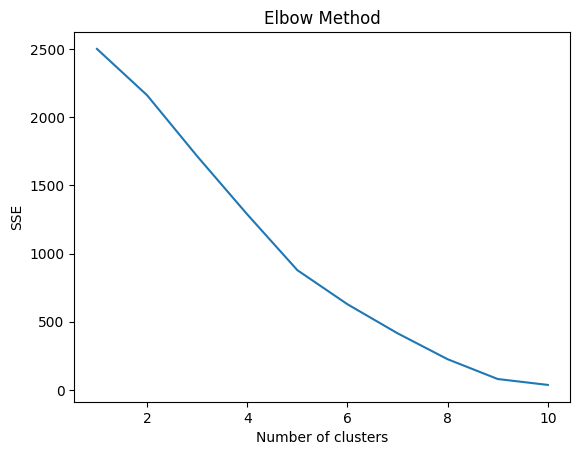

In [177]:
# using elbow method to find an optimal k
embeddings = [eval(e) for e in df_av.embedding]
ids = [e for e in df_av.bundleId]
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [174]:
# choosing k = 5
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(embeddings)
cluster_labels = kmeans.labels_
cluster_labels

array([1, 2, 4, 1, 2, 3, 0, 2, 3, 0, 3, 1, 4, 1, 3, 2, 2, 2], dtype=int32)

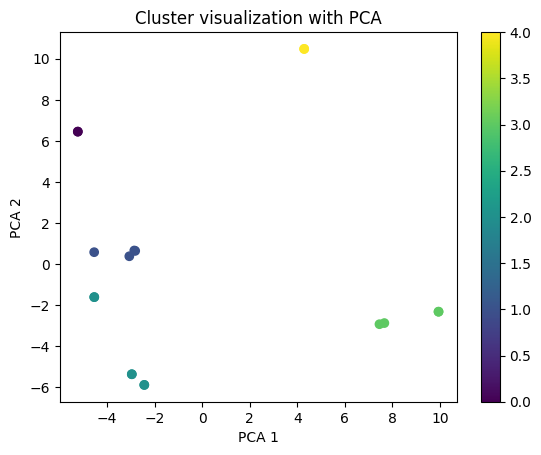

In [175]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Cluster visualization with PCA')
plt.colorbar()
plt.show()

In [182]:
id_to_cluster = dict(zip(ids, cluster_labels))
cluster_to_ids = defaultdict(list)
for id, cluster_label in id_to_cluster.items():
    cluster_to_ids[cluster_label].append(id)
cluster_to_ids = dict(sorted(cluster_to_ids.items()))
cluster_to_ids

{0: ['1569586264', 'com.volt.dresstoimpress'],
 1: ['com.loop.match3d', 'com.tilegarden.match3', '1529614832', '1502447854'],
 2: ['com.YayySAL.DodgeAgent',
  'com.AppIdeas.LevelUpRunner',
  'com.kamilbilge.ropesavior3d',
  '1542256628',
  '1579489488',
  '1586795332'],
 3: ['1582745578', 'se.ace.fishinc', 'dovi.coalmining.inc', '1436213906'],
 4: ['com.tintash.nailsalon', '1523081624']}

In [271]:
id_to_info_df = pd.DataFrame.from_dict(id_to_info, orient='index')
# id_to_info_df = id_to_info_df.reset_index().rename(columns={'index':'id'})
id_to_info_df

,avg,median,std
com.loop.match3d,1.420811,0.100,8.483918
com.YayySAL.DodgeAgent,0.445529,0.070,1.549642
com.tintash.nailsalon,0.300057,0.030,2.334698
com.tilegarden.match3,2.297261,0.060,9.004380
com.AppIdeas.LevelUpRunner,0.131547,0.070,0.231646
1582745578,2.179091,0.110,8.747192
1569586264,18.900179,13.905,16.551333
com.kamilbilge.ropesavior3d,0.451491,0.070,2.127699
se.ace.fishinc,1.831922,0.060,6.554923
com.volt.dresstoimpress,0.445255,0.050,0.872513


In [272]:
rows, cols = np.triu_indices_from(dist_df, k=1)
zero_distance_pairs = [(dist_df.index[i], dist_df.columns[j]) for i, j in zip(rows, cols) if dist_df.iloc[i, j] == 0]

zero_distance_pairs

[('com.YayySAL.DodgeAgent', '1542256628'),
 ('com.tintash.nailsalon', '1523081624'),
 ('com.AppIdeas.LevelUpRunner', '1586795332'),
 ('1582745578', 'dovi.coalmining.inc'),
 ('1569586264', 'com.volt.dresstoimpress'),
 ('com.kamilbilge.ropesavior3d', '1579489488')]

In [273]:
for c in cluster_to_ids.keys():
    ids_to_filter = cluster_to_ids[c]
    filtered_df = id_to_info_df.loc[ids_to_filter]
    print("cluster", c, "properties:")
    print(filtered_df)

cluster 0 properties:
                               avg  median        std
1569586264               18.900179  13.905  16.551333
com.volt.dresstoimpress   0.445255   0.050   0.872513
cluster 1 properties:
                            avg  median        std
com.loop.match3d       1.420811    0.10   8.483918
com.tilegarden.match3  2.297261    0.06   9.004380
1529614832             3.121816    0.11  13.530938
1502447854             2.269482    0.16  10.809523
cluster 2 properties:
                                  avg  median       std
com.YayySAL.DodgeAgent       0.445529   0.070  1.549642
com.AppIdeas.LevelUpRunner   0.131547   0.070  0.231646
com.kamilbilge.ropesavior3d  0.451491   0.070  2.127699
1542256628                   2.114797   0.465  4.982565
1579489488                   1.113208   0.080  3.167362
1586795332                   1.598364   0.160  5.136436
cluster 3 properties:
                          avg  median        std
1582745578           2.179091    0.11   8.747192
se.ac

# Correlating the embeddings distance with the mean sentPrice difference of each bundle pair

In [258]:
emb_dits_price_diff_tuples = []
bundle_ids = np.array(df_av.bundleId)
for id1 in bundle_ids:
    for id2 in bundle_ids:
        if id1 != id2:
            emb_dist = dist_df.loc[id1, id2]
    
            mean_sentPrice_id1 = id_avg_sentPrice_df.loc[id1, 'mean_sentPrice']
            mean_sentPrice_id2 = id_avg_sentPrice_df.loc[id2, 'mean_sentPrice']
            mean_price_diff = abs(mean_sentPrice_id1 - mean_sentPrice_id2)
            emb_dits_price_diff_tuples.append((emb_dist, mean_price_diff))
            
emb_dits_price_diff_tuples

[(0.5190248940392668, 0.13700223821894073),
 (0.5406562956460264, 0.15743737042064676),
 (0.3413626111232331, 0.12311872807577705),
 (0.4903505600152851, 0.18110867926673854),
 (0.5302592508010788, 0.10651889719794687),
 (0.498198642394893, 2.455404730641993),
 (0.4421204126579922, 0.13616479556536337),
 (0.4970764961299031, 0.057750573732404935),
 (0.498198642394893, 0.13704083732988667),
 (0.5302592714350567, 0.11624268100965293),
 (0.2809418893479936, 0.23894770471466079),
 (0.5406562956460264, 0.04480775064339673),
 (0.07736270066861806, 0.11921652978149565),
 (0.4696276851778374, 0.46324868531063457),
 (0.5190248940392668, 0.09748720935050217),
 (0.4421204126579922, 0.043210386737988396),
 (0.4903505600152851, 0.024941611992875763),
 (0.5190248940392668, 0.13700223821894073),
 (0.6108289939034904, 0.02043513220170602),
 (0.5530610553574717, 0.26012096629471776),
 (0.41042903197021774, 0.044106441047797804),
 (0.5093135368125403, 0.24352113541688758),
 (0.5621972532256078, 2.592406

In [259]:
emb_distance, price_diff = zip(*emb_dits_price_diff_tuples)

Since the sentPrice is not normally distributed, I'm using Spearman correlation coefficient.

In [260]:
spearman_corr, spearman_p_value = spearmanr(emb_distance, price_diff)
print(f'Spearman Correlation Coefficient: {spearman_corr:.3f}')
print(f'P-value: {spearman_p_value:.3f}')

Spearman Correlation Coefficient: 0.063
P-value: 0.268


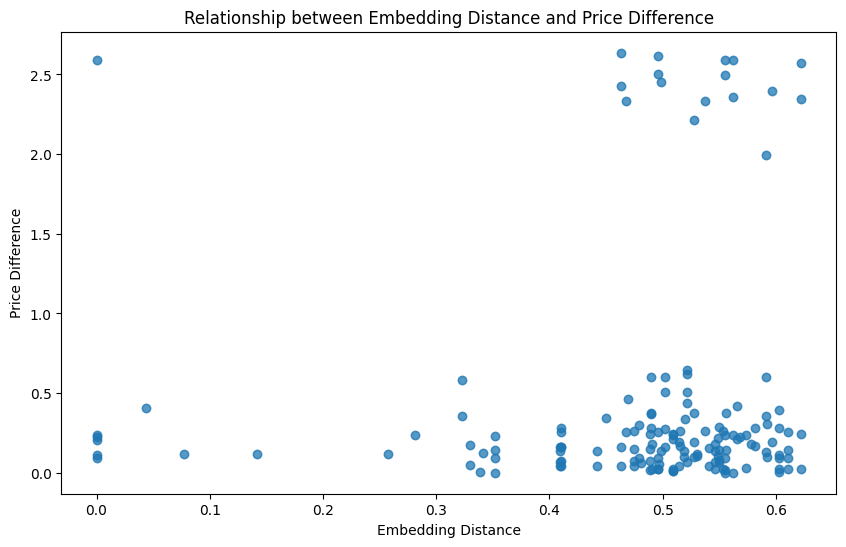

In [261]:
plt.figure(figsize=(10, 6))
plt.scatter(emb_distance, price_diff, alpha=0.5)
plt.title('Relationship between Embedding Distance and Price Difference')
plt.xlabel('Embedding Distance')
plt.ylabel('Price Difference')
plt.show()

Correlating the embeddings distance with the sentPrice distance of each bundle pair:
Here instead of using the mean sentPrice differences, I'm using the similarity between the sentPrice probability distributions (the sentPrice vectors are not necessarily the same size),
using the Earth Mover's Distance (EMD) method

In [270]:
emb_dist_price_dist_tuples = []
bundle_ids = np.array(df_av.bundleId)
for id1 in bundle_ids:
    for id2 in bundle_ids:
        if id1 != id2:
            emb_dist = dist_df.loc[id1, id2]
    
            sentPrice_id1 = df_auctions.loc[df_auctions['bundleId'] == id1, 'sentPrice']
            sentPrice_id2 = df_auctions.loc[df_auctions['bundleId'] == id2, 'sentPrice']
            price_distance = wasserstein_distance(sentPrice_id1, sentPrice_id2)
            emb_dist_price_dist_tuples.append((emb_dist, price_distance))
            
emb_dist_price_dist_tuples

[(0.5190248940392668, 0.9951734899841641),
 (0.5406562956460264, 1.1207543741160142),
 (0.3413626111232331, 0.9684364612973001),
 (0.4903505600152851, 1.3075009729968288),
 (0.5302592508010788, 1.2316561964689967),
 (0.498198642394893, 17.806154331299798),
 (0.4421204126579922, 0.988620966875518),
 (0.4970764961299031, 0.7677282945006995),
 (0.498198642394893, 0.9757897392636699),
 (0.5302592714350567, 0.8467036731028104),
 (0.2809418893479936, 1.8155552312441854),
 (0.5406562956460264, 0.3798064925857011),
 (0.07736270066861806, 0.8753598814512101),
 (0.4696276851778374, 3.304521906361204),
 (0.5190248940392668, 1.2585734444031296),
 (0.4421204126579922, 0.49147746030994394),
 (0.4903505600152851, 0.6522023979799212),
 (0.5190248940392668, 0.9951734899841641),
 (0.6108289939034904, 0.19837292805215406),
 (0.5530610553574717, 1.885098922102514),
 (0.41042903197021774, 0.3139819129278778),
 (0.5093135368125403, 1.7335615869279246),
 (0.5621972532256078, 18.454649249265586),
 (0.35216188

In [263]:
emb_distance, price_distances = zip(*emb_dist_price_dist_tuples)

In [264]:
spearman_corr, spearman_p_value = spearmanr(emb_distance, price_distances)
print(f'Spearman Correlation Coefficient: {spearman_corr:.3f}')
print(f'P-value: {spearman_p_value:.3f}')

Spearman Correlation Coefficient: 0.082
P-value: 0.155


Althoug in both correlations (using the mean sentPrice and the distributions similarity) the correlation coefficient is close to zero - meanning there is no correlation between the discription of the apps to their sent price, the p-value is greater than 0.05 indicating that these results are not statistically significant

# PART 2

lets explore the different features by looking at their distribution

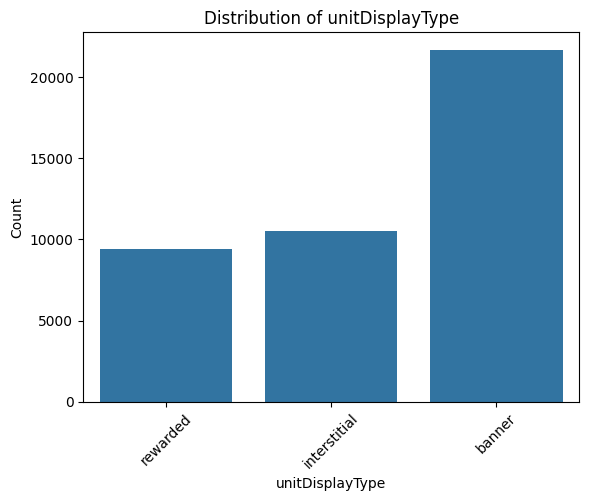

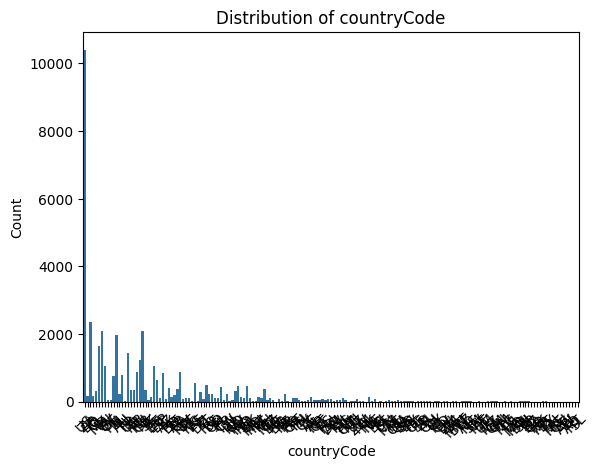

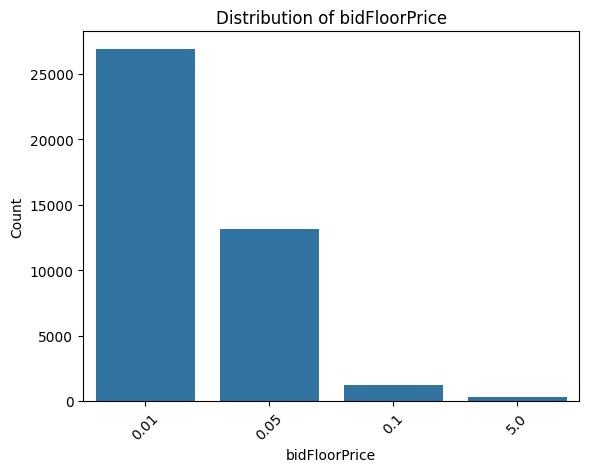

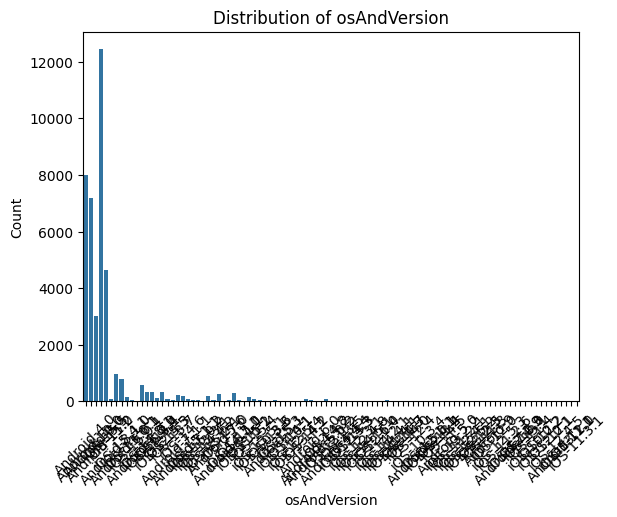

In [295]:
cols = ['unitDisplayType', 'countryCode', 'bidFloorPrice', 'osAndVersion']
for c in cols:  
    sns.countplot(data=df_auctions, x=c)
    plt.title('Distribution of ' + c)
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## Perform ANOVA test 

In [323]:
unit_display_type = df_auctions['unitDisplayType'].unique()
groups = [df_auctions[df_auctions['unitDisplayType'] == code]['sentPrice'] for code in unit_display_type]
f_statistic, p_value = stats.f_oneway(*groups)
print(f"F-Statistic: {f_statistic}, P-Value: {p_value}")

F-Statistic: 766.7817258109582, P-Value: 0.0


In [324]:
country_codes = df_auctions['countryCode'].unique()
groups = [df_auctions[df_auctions['countryCode'] == code]['sentPrice'] for code in country_codes]
f_statistic, p_value = stats.f_oneway(*groups)
print(f"F-Statistic: {f_statistic}, P-Value: {p_value}")

F-Statistic: 8.647660478528868, P-Value: 2.5818249221741832e-201


In [325]:
bid_floor_price = df_auctions['bidFloorPrice'].unique()
groups = [df_auctions[df_auctions['bidFloorPrice'] == code]['sentPrice'] for code in bid_floor_price]
f_statistic, p_value = stats.f_oneway(*groups)
print(f"F-Statistic: {f_statistic}, P-Value: {p_value}")

F-Statistic: 242.39335427870284, P-Value: 6.156629277504949e-156


In [326]:
os = df_auctions['osAndVersion'].unique()
groups = [df_auctions[df_auctions['osAndVersion'] == code]['sentPrice'] for code in os]
f_statistic, p_value = stats.f_oneway(*groups)
print(f"F-Statistic: {f_statistic}, P-Value: {p_value}")

F-Statistic: 4.570967425758902, P-Value: 5.653267019431861e-45


## In all those features the p-value << 0.05 , rejecting the null hypothesis, meaning there are significant differences in the sent prices among at least some of the groups